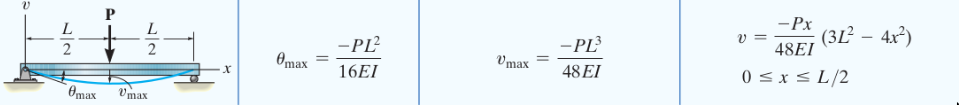

In [1]:
import sympy as sym

In [2]:
P, E, I, L, x = sym.symbols('P, E, I, L, x')

In [3]:
v1 = sym.Function('v_1')

In [4]:
M1 = P/2*x

In [5]:
eq1 = sym.Eq(sym.diff(v1(x),(x,2)), M1/(E*I))
display(eq1)

Eq(Derivative(v_1(x), (x, 2)), P*x/(2*E*I))

In [6]:
v2 = sym.Function('v_2')

In [7]:
M2 = -P*(x-L/2) + P/2*x

In [8]:
eq2 = sym.Eq(sym.diff(v2(x),(x,2)), M2/(E*I))
display(eq2)

Eq(Derivative(v_2(x), (x, 2)), (P*x/2 - P*(-L/2 + x))/(E*I))

In [9]:
diff_eq_soln = sym.dsolve([eq1, eq2],[v1(x), v2(x)])
display(diff_eq_soln)

[Eq(v_1(x), C1 + C2*x + P*x**3/(12*E*I)),
 Eq(v_2(x), C3 + C4*x + L*P*x**2/(4*E*I) - P*x**3/(12*E*I))]

In [10]:
v1_soln = diff_eq_soln[0].rhs
v2_soln = diff_eq_soln[1].rhs
display(v1_soln, v2_soln)

C1 + C2*x + P*x**3/(12*E*I)

C3 + C4*x + L*P*x**2/(4*E*I) - P*x**3/(12*E*I)

In [11]:
C1, C2, C3, C4 = sym.symbols('C1:5')

In [12]:
bc1_eq = sym.Eq(v1_soln.subs(x,0),0)
display(bc1_eq)

bc2_eq = sym.Eq(v2_soln.subs(x,L),0)
display(bc2_eq)

bc3_eq = sym.Eq(v1_soln.subs(x,L/2), v2_soln.subs(x,L/2))
display(bc3_eq)

bc4_eq = sym.Eq(sym.diff(v1_soln,x).subs(x,L/2), sym.diff(v2_soln, x).subs(x,L/2))
display(bc4_eq)

Eq(C1, 0)

Eq(C3 + C4*L + L**3*P/(6*E*I), 0)

Eq(C1 + C2*L/2 + L**3*P/(96*E*I), C3 + C4*L/2 + 5*L**3*P/(96*E*I))

Eq(C2 + L**2*P/(16*E*I), C4 + 3*L**2*P/(16*E*I))

In [13]:
constants = sym.solve([bc1_eq, bc2_eq, bc3_eq, bc4_eq],[C1, C2, C3, C4])
constants

{C1: 0, C2: -L**2*P/(16*E*I), C3: L**3*P/(48*E*I), C4: -3*L**2*P/(16*E*I)}

In [14]:
v1_soln_final = v1_soln.subs(constants)
display(v1_soln_final.simplify())

P*x*(-3*L**2 + 4*x**2)/(48*E*I)